In [1]:
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
import os
from tensorflow.keras.layers import Dense

### Esta es una red neuronal que predice edades de exoplanetas, y que puede servir para completar datos faltantes

In [2]:
os.chdir('/Users/benx/Documents/PythonCodes/AstronomicalData/HabitableWorlds')
# Cargar el dataset
data = pd.read_csv('hab_worlds_clean_optimist.csv')  
data

,Name,Type,Detection Method,Mass,Radius,Flux,T_surf,Period,Distance,Age,ESI
0,Kepler-62e,K Warm Superterran,Transit,5.773479,-1.612849,0.612131,0.738585,0.303714,0.476122,7.00,0.83
1,Kepler-452 b,G Warm Superterran,Transit,-0.647823,-1.556074,0.509092,0.679248,3.390464,1.513502,6.00,0.83
2,Wolf 1061C,M Warm Superterran,Radial Velocity,-0.624266,-1.470912,0.998526,1.005600,-0.922738,-0.750218,NaN,0.80
3,GJ 667CC,M Warm Superterran,Radial Velocity,-0.547705,-1.158652,-0.083380,0.174887,-0.802567,-0.738043,2.00,0.80
4,Kepler-1544 b,K Warm Superterran,Transit,-0.543779,-1.130264,-0.186419,0.085882,0.845663,0.616891,2.34,0.79
5,Kepler-283 C,K Warm Superterran,Transit,-0.514332,-1.016715,-0.057620,0.204555,-0.041483,1.167286,3.09,0.79
6,Ross 508b,M Warm Superterran,Radial Velocity,-0.508443,-0.988328,1.050045,0.857258,-1.006387,-0.721557,NaN,0.77
7,Kepler-440 b,K Warm Superterran,Transit,-0.484886,-0.903166,1.359161,1.035268,0.056303,0.476122,1.30,0.75
8,GJ 433d,M Warm Superterran,Radial Velocity,-0.268945,-0.108320,0.380294,0.560575,-0.708315,-0.730434,NaN,0.74
9,Kepler- 1653 b,K Warm Superterran,Transit,-0.243424,-0.023158,0.328775,0.530907,0.515781,2.354312,7.70,0.74


In [3]:
# Eliminar la columna 'ESI'
data = data.drop(columns=['ESI','Name','Type','Detection Method'])
data= data.dropna()
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(columns=['Age'])
y = data['Age']

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
data

,Mass,Radius,Flux,T_surf,Period,Distance,Age
0,5.773479,-1.612849,0.612131,0.738585,0.303714,0.476122,7.00
1,-0.647823,-1.556074,0.509092,0.679248,3.390464,1.513502,6.00
3,-0.547705,-1.158652,-0.083380,0.174887,-0.802567,-0.738043,2.00
4,-0.543779,-1.130264,-0.186419,0.085882,0.845663,0.616891,2.34
5,-0.514332,-1.016715,-0.057620,0.204555,-0.041483,1.167286,3.09
7,-0.484886,-0.903166,1.359161,1.035268,0.056303,0.476122,1.30
9,-0.243424,-0.023158,0.328775,0.530907,0.515781,2.354312,7.70
10,-0.292502,-0.193482,-0.366736,-0.092128,-0.472686,0.377203,3.89
12,-0.184531,0.175553,0.354534,0.560575,-0.512743,0.445685,2.90
13,0.492738,-0.221869,1.281882,0.085882,2.271222,0.036060,7.00


In [4]:


# Dividir los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir la red neuronal
model = Sequential([
    Dense(64, activation='softmax', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Capa de salida para predecir 'Age'
])





/Users/benx/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo y guardamos el historial de entrenamiento
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

# Evaluamos el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print("Error de prueba:", loss)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 17.4151 - val_loss: 19.0821
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.3241 - val_loss: 19.0020
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.2321 - val_loss: 18.9215
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.1400 - val_loss: 18.8383
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 17.0476 - val_loss: 18.7511
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.9559 - val_loss: 18.6624
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.8661 - val_loss: 18.5729
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 16.7772 - val_loss: 18.4837
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.6887 - val_loss: 18.3950
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.6012 - val_loss: 18.3073
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.5147 - val_loss: 18.2205
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.1971 - val_loss: 6.9357
Epoch 136/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.1471 - val_loss: 6.8858
Epoch 137/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.0986 - val_loss: 6.8373
Epoch 138/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.0517 - val_loss: 6.7903
Epoch 139/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.0063 - val_loss: 6.7448
Epoch 140/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.9624 - val_loss: 6.7007
Epoch 141/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.9200 - val_loss: 6.6581
Epoch 142/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8792 - val_loss: 6.6169
Epoch 143/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8398 - val_loss: 6.5772
Epoch 144/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8018 - val_loss: 6.5389
Epoch 145/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.7653 - val_loss: 6.5019
Epoch 146/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - los

Epoch 203/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.9210 - val_loss: 5.6097
Epoch 204/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9118 - val_loss: 5.6016
Epoch 205/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.9024 - val_loss: 5.5935
Epoch 206/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8929 - val_loss: 5.5855
Epoch 207/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8832 - val_loss: 5.5775
Epoch 208/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8734 - val_loss: 5.5695
Epoch 209/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.8630 - val_loss: 5.5612
Epoch 210/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.8523 - val_loss: 5.5526
Epoch 211/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.8413 - val_loss: 5.5435
Epoch 212/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8296 - val_loss: 5.5336
Epoch 213/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8181 - val_loss: 5.5258
Epoch 214/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

Epoch 338/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.2083 - val_loss: 5.6784
Epoch 339/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1864 - val_loss: 5.7001
Epoch 340/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1648 - val_loss: 5.7222
Epoch 341/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1434 - val_loss: 5.7443
Epoch 342/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1223 - val_loss: 5.7663
Epoch 343/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1014 - val_loss: 5.7884
Epoch 344/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0809 - val_loss: 5.8108
Epoch 345/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0607 - val_loss: 5.8333
Epoch 346/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0409 - val_loss: 5.8557
Epoch 347/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0213 - val_loss: 5.8781
Epoch 348/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0021 - val_loss: 5.9004
Epoch 349/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

Epoch 473/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2324 - val_loss: 7.4516
Epoch 474/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2311 - val_loss: 7.4560
Epoch 475/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2298 - val_loss: 7.4595
Epoch 476/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2285 - val_loss: 7.4631
Epoch 477/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2272 - val_loss: 7.4665
Epoch 478/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2259 - val_loss: 7.4700
Epoch 479/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2247 - val_loss: 7.4736
Epoch 480/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2233 - val_loss: 7.4775
Epoch 481/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2221 - val_loss: 7.4807
Epoch 482/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2208 - val_loss: 7.4835
Epoch 483/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2196 - val_loss: 7.4868
Epoch 484/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1063 - val_loss: 7.9358
Epoch 608/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1056 - val_loss: 7.9384
Epoch 609/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1049 - val_loss: 7.9410
Epoch 610/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1042 - val_loss: 7.9440
Epoch 611/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1036 - val_loss: 7.9469
Epoch 612/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1029 - val_loss: 7.9493
Epoch 613/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1022 - val_loss: 7.9514
Epoch 614/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1016 - val_loss: 7.9536
Epoch 615/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1009 - val_loss: 7.9559
Epoch 616/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1002 - val_loss: 7.9583
Epoch 617/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0995 - val_loss: 7.9609
Epoch 618/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - los

Epoch 675/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0648 - val_loss: 8.0874
Epoch 676/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0643 - val_loss: 8.0900
Epoch 677/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0637 - val_loss: 8.0923
Epoch 678/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0632 - val_loss: 8.0943
Epoch 679/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0627 - val_loss: 8.0961
Epoch 680/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0622 - val_loss: 8.0984
Epoch 681/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0616 - val_loss: 8.1008
Epoch 682/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0611 - val_loss: 8.1033
Epoch 683/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0606 - val_loss: 8.1057
Epoch 684/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0601 - val_loss: 8.1084
Epoch 685/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0596 - val_loss: 8.1116
Epoch 686/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

Epoch 810/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0177 - val_loss: 8.3298
Epoch 811/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0175 - val_loss: 8.3310
Epoch 812/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0173 - val_loss: 8.3317
Epoch 813/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0171 - val_loss: 8.3320
Epoch 814/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0169 - val_loss: 8.3320
Epoch 815/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0167 - val_loss: 8.3321
Epoch 816/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0165 - val_loss: 8.3331
Epoch 817/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0163 - val_loss: 8.3343
Epoch 818/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0161 - val_loss: 8.3349
Epoch 819/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0159 - val_loss: 8.3351
Epoch 820/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0157 - val_loss: 8.3349
Epoch 821/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

Epoch 945/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0025 - val_loss: 8.2654
Epoch 946/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0025 - val_loss: 8.2644
Epoch 947/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0024 - val_loss: 8.2636
Epoch 948/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0024 - val_loss: 8.2628
Epoch 949/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0023 - val_loss: 8.2618
Epoch 950/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0023 - val_loss: 8.2611
Epoch 951/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0023 - val_loss: 8.2602
Epoch 952/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0022 - val_loss: 8.2595
Epoch 953/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0022 - val_loss: 8.2588
Epoch 954/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0021 - val_loss: 8.2579
Epoch 955/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0021 - val_loss: 8.2570
Epoch 956/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

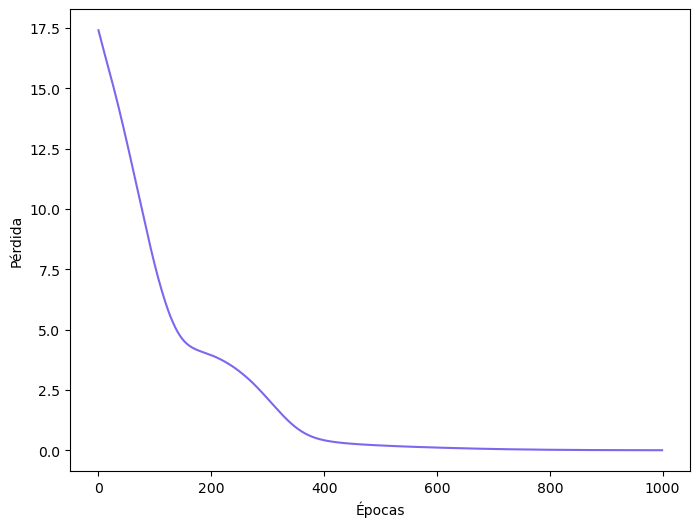

In [8]:
# Graficamos la función de costo
plt.figure(figsize=(8, 6))

plt.plot(history.history['loss'],color='mediumslateblue')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.savefig('Age_costo.png')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


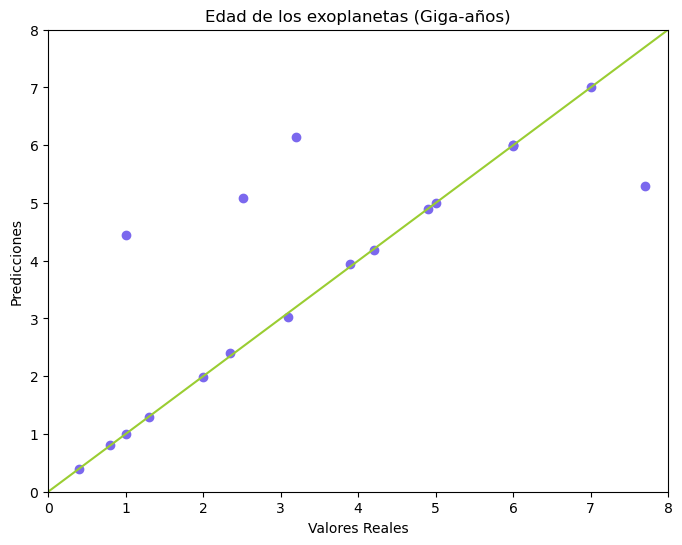

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

x = np.linspace(0,8,100)
# Predicciones del modelo en el conjunto de train
predictions = model.predict(X_train)

# Graficamos valores reales vs predicciones
plt.scatter(y_train, predictions, color='mediumslateblue')
plt.plot(x,x, color='yellowgreen')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Edad de los exoplanetas (Giga-años)')
plt.xlim(0,8)
plt.ylim(0,8)
plt.savefig('Age_results.png')
plt.show()
